In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
#  # 2. постройте гистограмму 
# # 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1. 
# # 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM. 
# # 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray. 
# # 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
#  # Для каждого решения - напечатайте результат

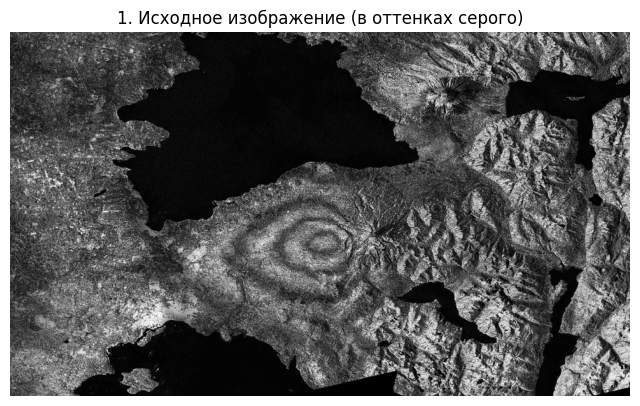

In [ ]:


from skimage import io, color, exposure, filters, util
from skimage.metrics import mean_squared_error, structural_similarity
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


img_path = "sar_2_color.jpg"  


img_color = io.imread(img_path)
img_gray = color.rgb2gray(img_color)
img_gray = util.img_as_float(img_gray)

plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("1. Исходное изображение (в оттенках серого)")
plt.axis('off')
plt.show()


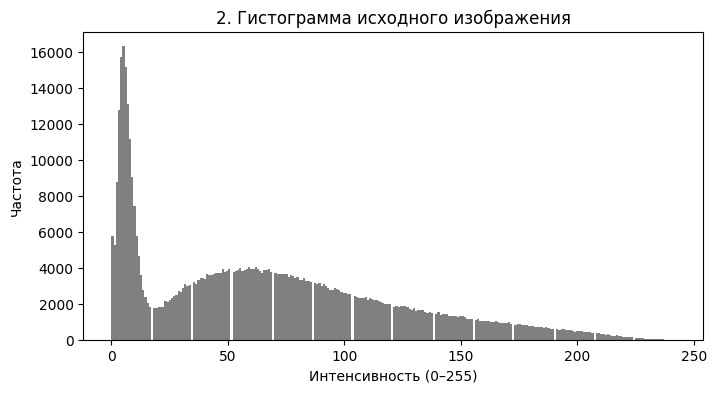

In [ ]:


plt.figure(figsize=(8, 4))
plt.hist((img_gray.ravel() * 255).astype(np.uint8), bins=256, color='gray')
plt.title("2. Гистограмма исходного изображения")
plt.xlabel("Интенсивность (0–255)")
plt.ylabel("Частота")
plt.show()


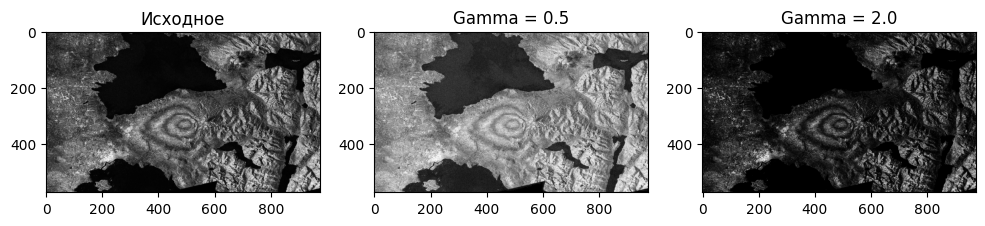

In [ ]:


def gamma_correction(image, gamma):
    return np.clip(image ** gamma, 0, 1)

gamma_values = [0.5, 2.0]
gamma_corrected = [gamma_correction(img_gray, g) for g in gamma_values]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Исходное")

for i, g in enumerate(gamma_values):
    plt.subplot(1, 3, i + 2)
    plt.imshow(gamma_corrected[i], cmap='gray')
    plt.title(f"Gamma = {g}")
plt.show()


In [ ]:


from skimage.metrics import mean_squared_error, structural_similarity
import pandas as pd

results = []
for g, img_g in zip(gamma_values, gamma_corrected):
    mse = mean_squared_error(img_gray, img_g)
    ssim = structural_similarity(img_gray, img_g, data_range=1.0)
    results.append({'Gamma': g, 'MSE': mse, 'SSIM': ssim})

df_metrics = pd.DataFrame(results)
print("Метрики сравнения (MSE и SSIM):")
print(df_metrics)


Метрики сравнения (MSE и SSIM):
   Gamma       MSE      SSIM
0    0.5  0.042086  0.696327
1    2.0  0.029946  0.508196


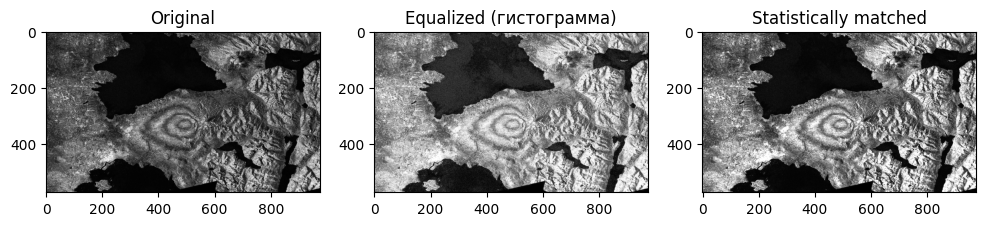

Original        | mean = 0.2656 | std = 0.2109
Equalized       | mean = 0.5037 | std = 0.2865
Stat-Corrected  | mean = 0.4948 | std = 0.2671


In [ ]:


eq_gray = exposure.equalize_hist(img_gray)

def stats_match(src, ref):
    s_mean, s_std = np.mean(src), np.std(src)
    r_mean, r_std = np.mean(ref), np.std(ref)
    result = (src - s_mean) * (r_std / s_std) + r_mean
    return np.clip(result, 0, 1)

stat_corrected = stats_match(img_gray, eq_gray)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title("Equalized (гистограмма)")

plt.subplot(1, 3, 3)
plt.imshow(stat_corrected, cmap='gray')
plt.title("Statistically matched")
plt.show()

for name, im in zip(["Original", "Equalized", "Stat-Corrected"], [img_gray, eq_gray, stat_corrected]):
    print(f"{name:15s} | mean = {np.mean(im):.4f} | std = {np.std(im):.4f}")


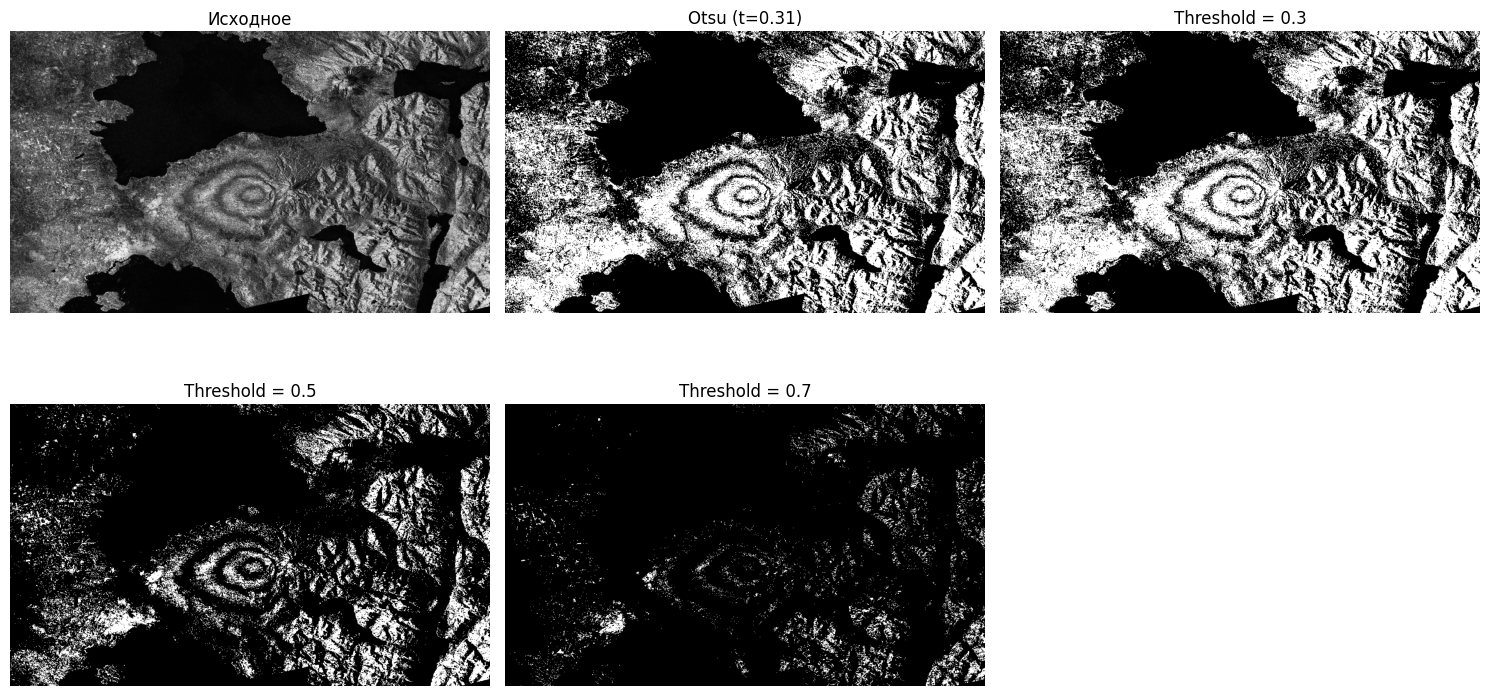

In [ ]:


from skimage import filters
import matplotlib.pyplot as plt

th_otsu = filters.threshold_otsu(img_gray)
binary_otsu = img_gray > th_otsu

thresholds = [0.3, 0.5, 0.7]
binaries = [img_gray > t for t in thresholds]

images = [img_gray, binary_otsu] + binaries
titles = [
    "Исходное",
    f"Otsu (t={th_otsu:.2f})",
] + [f"Threshold = {t}" for t in thresholds]

cols = 3
rows = int(np.ceil(len(images) / cols))

plt.figure(figsize=(5 * cols, 4 * rows))

for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

